##################################################################################################

## Antes você deve fazer upload das pastas "scripts" e "sources" disponíveis no github

##################################################################################################

In [118]:
import os
import sys
import csv
import json
import io
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score    
sources_path = './sources'
if sources_path not in sys.path:
    sys.path.append(sources_path)
import utils
from funk_svd.svd import SVD
import mab
import joblib
import pickle
from IPython.display import clear_output

progbar = utils.ProgressBar(elapsed_time=True)

palette = "purple",
second_palette = ["#60489D", "#46BB93", "#F9B74D", "#2D2D2D", "#9F1253", "#A9A8A8", "#56DCE3", "#4260AD"]

In [119]:
## Variables
root_path = ''
RandomToAddFile = 'RandomVisitBuyingCount.csv'
cvsRandomFile = 'DataWithRandom.csv'
cvsDataFile = 'Data.csv'
profile = 'Profile.csv'
sources_path = './sources'
config = utils.load_json_file(os.path.join(sources_path, "config.json"))

Rode apenas se não tiver já dado upload no arquivo "RandomVisitBuyingCount.csv" disponibilizado no github

In [ ]:
from google.colab import files
# adcionar aqui o dataset 'RandomVisitBuyingCount.csv' disponibilizado no github
upload = files.upload()
upload

Rode apenas se não tiver já dado upload no arquivo "Data.csv" disponibilizado pela Ambev

In [ ]:
from google.colab import files
# adcionar aqui o dataset 'Data.csv' disponibilizado pela Ambev
upload2 = files.upload()
upload2

In [121]:
import pandas as pd
dataToAdd = pd.read_csv(root_path + RandomToAddFile)
dataToAdd

,Ship-to ID,Visit_Count,Purchase_Count
0,29000310,68,91
1,29000419,54,100
2,29000430,94,57
3,29000430,36,62
4,29000430,39,36
...,...,...,...
39840,29949511,1,53
39841,29950463,36,14
39842,29950463,10,84
39843,29950463,86,98


In [122]:
AuxiliarFile = pd.read_csv(root_path + cvsDataFile)
AuxiliarFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Product Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total
0,29000310,0.480,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.00,0.480,12.23,Brussels Capital Region,0.00
1,29000419,0.450,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.00,0.450,7.85,Liège,0.00
2,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.00,238.570,3577.69,Antwerp,14511.46
3,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,6001.00,1425.19,180.00,20.400,519.41,Antwerp,1605.19
4,29000430,270.970,225.720,Tier 1,Mainstream,Drink Led,Party Place,RETURNABLE_KEG_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,KEG,RETURNABLE,3051.36,718.32,0.00,12.000,288.63,Antwerp,718.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,29949511,48.853,1.241,Tier 2,Mainstream,Drink Led,Bar,RETURNABLE_BOTTLE_TRIPEL KARMELIET_TRIPEL KARM...,TRIPEL KARMELIET,TRIPEL KARMELIET,BOTTLE,RETURNABLE,613.76,68.06,201.76,1.583,65.69,Luxembourg,269.82
39855,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00
39856,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00
39857,29950463,0.000,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,0.00,0.00,0.00,0.000,0.00,Hainaut,0.00


In [123]:
dataSetOriginal = pd.merge(AuxiliarFile, dataToAdd, on='Ship-to ID')
dataSetOriginal

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Product Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00,68,91
1,29000419,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00,54,100
2,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,94,57
3,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,36,62
4,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550140,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,87,21
550141,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,36,14
550142,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,10,84
550143,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,86,98


In [124]:
# export dataSetOriginal to DataWithRandom.csv
dataSetOriginal.to_csv(root_path + 'DataWithRandom.csv', index=False)
dataSetOriginal = pd.read_csv(root_path + 'DataWithRandom.csv')
dataSetOriginal

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,sub_segment,Product Set,Brand,Sub-Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,province,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,Tier 0,Mainstream,Entertainment Led,Events,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BOTTLE,RETURNABLE,141.20,0.00,0.0,0.48,12.23,Brussels Capital Region,0.00,68,91
1,29000419,0.45,0.540,Tier 1,Mainstream,Not applicable,Not applicable,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE,PIEDBOEUF,PIEDBOEUF TRIPLE,BOTTLE,RETURNABLE,113.65,0.00,0.0,0.45,7.85,Liège,0.00,54,100
2,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,94,57
3,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,36,62
4,29000430,270.97,225.720,Tier 1,Mainstream,Drink Led,Party Place,OW_BULK_JUPILER_JUPILER PILS,JUPILER,JUPILER PILS,BULK,OW,61551.06,14511.46,0.0,238.57,3577.69,Antwerp,14511.46,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550140,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE,PIEDBOEUF,PIEDBOEUF FONCEE,BOTTLE,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,87,21
550141,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,36,14
550142,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,10,84
550143,29950463,0.00,0.000,Tier 2,0,Wholesaler,Wholesaler,RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE,HOEGAARDEN,HOEGAARDEN ROSEE,KEG,RETURNABLE,0.00,0.00,0.0,0.00,0.00,Hainaut,0.00,86,98


In [125]:
train_data = dataSetOriginal

In [126]:
#tratar dados
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 1"],1)
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 0"],0)
train_data['sfdc_tier']= train_data['sfdc_tier'].replace(["Tier 2"],2)
train_data['poc_image']= train_data['poc_image'].replace(["Mainstream"],1)
train_data['poc_image']= train_data['poc_image'].replace(["Premium"],2)

train_data['segment']= train_data['segment'].replace(["Not applicable"],0)
train_data['segment']= train_data['segment'].replace(["Entertainment Led"],1)
train_data['segment']= train_data['segment'].replace(["Drink Led"],2)
train_data['segment']= train_data['segment'].replace(["Institutional"],3)
train_data['segment']= train_data['segment'].replace([" "],99)
train_data['segment']= train_data['segment'].replace(["Food Led"],4)
train_data['segment']= train_data['segment'].replace(["Entertainment"],5)
train_data['segment']= train_data['segment'].replace(["Wholesaler"],6)
del train_data['sub_segment']
del train_data['Product Set']

train_data['Brand']= train_data['Brand'].replace(["JUPILER"],1)
train_data['Brand']= train_data['Brand'].replace(["PIEDBOEUF"],2)
train_data['Brand']= train_data['Brand'].replace(["DIEKIRCH"],3)
train_data['Brand']= train_data['Brand'].replace(["BELLE VUE"],4)
train_data['Brand']= train_data['Brand'].replace(["HOEGAARDEN"],5)
train_data['Brand']= train_data['Brand'].replace(["LEFFE"],4)
train_data['Brand']= train_data['Brand'].replace(["TRIPEL KARMELIET"],5)
train_data['Brand']= train_data['Brand'].replace(["GOOSE ISLAND"],6)
train_data['Brand']= train_data['Brand'].replace(["STELLA ARTOIS"],7)
train_data['Brand']= train_data['Brand'].replace(["CORONA"],8)
train_data['Brand']= train_data['Brand'].replace(["VIEUX TEMPS"],9)
train_data['Brand']= train_data['Brand'].replace(["SCOTCH CTS"],10)
train_data['Brand']= train_data['Brand'].replace(["PURE BLONDE"],11)
train_data['Brand']= train_data['Brand'].replace(["CUBANISTO"],12)
train_data['Brand']= train_data['Brand'].replace(["GINETTE"],13)
train_data['Brand']= train_data['Brand'].replace(["KWAK"],14)
train_data['Brand']= train_data['Brand'].replace(["BASS"],15)
train_data['Brand']= train_data['Brand'].replace(["KRUGER"],16)
train_data['Brand']= train_data['Brand'].replace(["HORSE ALE"],17)
train_data['Brand']= train_data['Brand'].replace(["GINDER-ALE"],18)
train_data['Brand']= train_data['Brand'].replace(["DEUS"],19)
train_data['Brand']= train_data['Brand'].replace(["SAFIR"],20)
train_data['Brand']= train_data['Brand'].replace(["BIRRA DEL BORGO"],21)

del train_data['Sub-Brand']

train_data['Pack_Type']= train_data['Pack_Type'].replace(["BOTTLE"],1)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["BULK"],2)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["KEG"],3)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["CAN"],4)
train_data['Pack_Type']= train_data['Pack_Type'].replace(["PERFECTDRAFT"],5)

train_data['Returnalility']= train_data['Returnalility'].replace(["RETURNABLE"],1)
train_data['Returnalility']= train_data['Returnalility'].replace(["OW"],0)

del train_data['province']

# fim tratar dados#

train_data.head()
#train_data.info()

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,0,1,1,1,1,1,141.20,0.00,0.0,0.48,12.23,0.00,68,91
1,29000419,0.45,0.540,1,1,0,2,1,1,113.65,0.00,0.0,0.45,7.85,0.00,54,100
2,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,94,57
3,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,36,62
4,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,39,36


In [127]:
train_data.head()

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,0,1,1,1,1,1,141.20,0.00,0.0,0.48,12.23,0.00,68,91
1,29000419,0.45,0.540,1,1,0,2,1,1,113.65,0.00,0.0,0.45,7.85,0.00,54,100
2,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,94,57
3,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,36,62
4,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,39,36


In [128]:
auxFile = train_data

In [129]:
auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,poc_image,segment,Brand,Pack_Type,Returnalility,GTO_2019,OnInvoice Discount(LCU),OffInvoice Discount(LCU),Volume_2019 Product,Tax,Discount_Total,Visit_Count,Purchase_Count
0,29000310,0.48,0.557,0,1,1,1,1,1,141.20,0.00,0.0,0.48,12.23,0.00,68,91
1,29000419,0.45,0.540,1,1,0,2,1,1,113.65,0.00,0.0,0.45,7.85,0.00,54,100
2,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,94,57
3,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,36,62
4,29000430,270.97,225.720,1,1,2,1,2,0,61551.06,14511.46,0.0,238.57,3577.69,14511.46,39,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550140,29950463,0.00,0.000,2,0,6,2,1,1,0.00,0.00,0.0,0.00,0.00,0.00,87,21
550141,29950463,0.00,0.000,2,0,6,5,3,1,0.00,0.00,0.0,0.00,0.00,0.00,36,14
550142,29950463,0.00,0.000,2,0,6,5,3,1,0.00,0.00,0.0,0.00,0.00,0.00,10,84
550143,29950463,0.00,0.000,2,0,6,5,3,1,0.00,0.00,0.0,0.00,0.00,0.00,86,98


**Obter IDs unicos de estabelecimentos**

In [130]:
# sorting by first name
auxFile = train_data
auxFile.sort_values("Ship-to ID", inplace = True)
# dropping ALL duplicate values
#auxFile.dropDuplicates(['Ship-to ID']).show()
auxFile.drop_duplicates(subset ="Ship-to ID", keep = 'first', inplace = True)
# removing other columns
auxFile.drop(auxFile.columns[[4,6,7,8,9,10,11,12,13,14]], axis=1,inplace=True)
# displaying data
auxFile.head

<bound method NDFrame.head of         Ship-to ID  Volume_2019  ...  Visit_Count  Purchase_Count
0         29000310        0.480  ...           68              91
1         29000419        0.450  ...           54             100
10        29000430      270.970  ...           39              36
20        29000485       29.610  ...           24              64
27        29000699        0.420  ...           72              50
...            ...          ...  ...          ...             ...
548898    29949335       15.400  ...           90              51
548901    29949357        0.420  ...           21              78
548903    29949393        1.000  ...           94              27
549724    29949511       48.853  ...           75              38
550142    29950463        0.000  ...           10              84

[4568 rows x 7 columns]>

In [131]:
auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Visit_Count,Purchase_Count
0,29000310,0.480,0.557,0,1,68,91
1,29000419,0.450,0.540,1,0,54,100
10,29000430,270.970,225.720,1,2,39,36
20,29000485,29.610,25.860,2,3,24,64
27,29000699,0.420,0.505,2,99,72,50
...,...,...,...,...,...,...,...
548898,29949335,15.400,3.200,2,1,90,51
548901,29949357,0.420,1.500,1,3,21,78
548903,29949393,1.000,1.988,0,1,94,27
549724,29949511,48.853,1.241,2,2,75,38


**Gerar dados adicionais = media de compra atraves de visita e numero de contas e quando se tornou membro**

In [132]:
# combining Visit_Count and Purchase_Count into Buying_Average
auxFile['Buying_Average'] = auxFile['Purchase_Count'] / auxFile['Visit_Count']
auxFile.drop(columns=['Visit_Count','Purchase_Count'], axis=1,inplace=True)
auxFile

,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average
0,29000310,0.480,0.557,0,1,1.338235
1,29000419,0.450,0.540,1,0,1.851852
10,29000430,270.970,225.720,1,2,0.923077
20,29000485,29.610,25.860,2,3,2.666667
27,29000699,0.420,0.505,2,99,0.694444
...,...,...,...,...,...,...
548898,29949335,15.400,3.200,2,1,0.566667
548901,29949357,0.420,1.500,1,3,3.714286
548903,29949393,1.000,1.988,0,1,0.287234
549724,29949511,48.853,1.241,2,2,0.506667


In [133]:
auxFile = auxFile.reset_index()

In [134]:
# adding Became_Member_on
import random
auxFile['Became_Member_on'] = 0
random.seed(10)
random_dates = {}
length = len(auxFile)
for i in range(length):
  year = (str(random.randint(2000,2019)))
  month = (str(random.randint(1,12)))
  if len(month)==1:
    month = '0' + month
  day = (str(random.randint(1,30)))
  if len(day)==1:
    day = '0'+day
  random_dates[i] = (year+month+day)

for i in range(length):
  auxFile['Became_Member_on'][i]= random_dates[i]
auxFile

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on
0,0,29000310,0.480,0.557,0,1,1.338235,20180114
1,1,29000419,0.450,0.540,1,0,1.851852,20151001
2,10,29000430,270.970,225.720,1,2,0.923077,20060827
3,20,29000485,29.610,25.860,2,3,2.666667,20150521
4,27,29000699,0.420,0.505,2,99,0.694444,20050117
...,...,...,...,...,...,...,...,...
4563,548898,29949335,15.400,3.200,2,1,0.566667,20140105
4564,548901,29949357,0.420,1.500,1,3,3.714286,20180314
4565,548903,29949393,1.000,1.988,0,1,0.287234,20140715
4566,549724,29949511,48.853,1.241,2,2,0.506667,20060708


Obter produto favorito


In [135]:
auxFile2 = pd.read_csv(root_path + cvsRandomFile)

del auxFile2['Volume_2019']
del auxFile2['Volume_2018']
del auxFile2['poc_image']
del auxFile2['segment']
del auxFile2['sub_segment']
del auxFile2['Brand']
del auxFile2['Sub-Brand']
del auxFile2['Pack_Type']
del auxFile2['OnInvoice Discount(LCU)']
del auxFile2['OffInvoice Discount(LCU)']
del auxFile2['Tax']
del auxFile2['province']
del auxFile2['Discount_Total']
del auxFile2['Visit_Count']
del auxFile2['Purchase_Count']
del auxFile2['sfdc_tier']
del auxFile2['GTO_2019']
del auxFile2['Returnalility']
auxFile2.rename({"Ship-to ID": "estabelecimento"}, axis=1, inplace=True)
auxFile2 = auxFile2.groupby('estabelecimento', sort=False).agg({'Volume_2019 Product': 'max', 'Product Set': 'first'})
auxFile2.reset_index()

,estabelecimento,Volume_2019 Product,Product Set
0,29000310,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,29000419,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,29000430,238.570,OW_BULK_JUPILER_JUPILER PILS
3,29000485,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,29000699,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...,...
4563,29949335,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,29949357,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,29949393,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,29949511,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [136]:
auxFile2.reset_index(inplace=True, drop=True)
auxFile2

,Volume_2019 Product,Product Set
0,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,238.570,OW_BULK_JUPILER_JUPILER PILS
3,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...
4563,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [137]:
# add most wanted product from auxFile2 to auxFile
auxFile['Volume_2019_MWP'] = auxFile2['Volume_2019 Product']
auxFile['Most_Wanted_Product(MWP)'] = auxFile2['Product Set']
auxFile

,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on,Volume_2019_MWP,Most_Wanted_Product(MWP)
0,0,29000310,0.480,0.557,0,1,1.338235,20180114,0.480,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,1,29000419,0.450,0.540,1,0,1.851852,20151001,0.450,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,10,29000430,270.970,225.720,1,2,0.923077,20060827,238.570,OW_BULK_JUPILER_JUPILER PILS
3,20,29000485,29.610,25.860,2,3,2.666667,20150521,17.370,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,27,29000699,0.420,0.505,2,99,0.694444,20050117,0.360,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
...,...,...,...,...,...,...,...,...,...,...
4563,548898,29949335,15.400,3.200,2,1,0.566667,20140105,15.400,RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REG...
4564,548901,29949357,0.420,1.500,1,3,3.714286,20180314,0.240,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
4565,548903,29949393,1.000,1.988,0,1,0.287234,20140715,1.000,RETURNABLE_KEG_GINETTE_ GINETTE LAGER
4566,549724,29949511,48.853,1.241,2,2,0.506667,20060708,26.435,OW_BOTTLE_CORONA_CORONA EXTRA


In [138]:
# CREATE A REWARD DATABASE
rewardData = pd.DataFrame(auxFile['Ship-to ID'].copy())
rewardData

,Ship-to ID
0,29000310
1,29000419
2,29000430
3,29000485
4,29000699
...,...
4563,29949335
4564,29949357
4565,29949393
4566,29949511


In [139]:
# add random 'discount_id'; 'discount_viewed'; 'discount_used'; 'purchase_completed'; 'Future_Purchase'; 'discount_reward'
import random
columnsToAdd = ['discount_viewed', 'discount_used', 'purchase_completed', 'Future_Purchase']
rewardData['discount_id'] = 0
rewardData['discount_viewed'] = 0
rewardData['discount_used'] = 0
rewardData['purchase_completed'] = 0
rewardData['Future_Purchase'] = 0
rewardData['discount_reward'] = 0
random.seed(10)
ctaLength = len(columnsToAdd)
rdLength = len(rewardData)
#  rewardData['discount_id'][i] = (str(uuid.uuid4()))
# add discount_id
for i in range(rdLength):
  rewardData['discount_id'][i] = (str(random.randint(0,10)))
# add 0-1
for x in range(ctaLength):
  for i in range(rdLength):
    rewardData[columnsToAdd[x]][i] = (str(random.randint(0,1)))
# add discount_reward
for i in range(rdLength):
  rewardData['discount_reward'][i] = (str(random.randint(1,10)))

rewardData

,Ship-to ID,discount_id,discount_viewed,discount_used,purchase_completed,Future_Purchase,discount_reward
0,29000310,9,0,0,0,0,2
1,29000419,0,1,0,0,0,9
2,29000430,6,1,0,1,0,1
3,29000485,7,1,1,0,1,8
4,29000699,9,0,1,0,0,4
...,...,...,...,...,...,...,...
4563,29949335,4,0,0,1,1,6
4564,29949357,5,0,0,1,0,1
4565,29949393,9,1,1,0,1,7
4566,29949511,8,1,1,1,0,2


In [140]:
auxFile3 = auxFile
auxFile3['Most_Wanted_Product(MWP)'].value_counts()

OW_BOTTLE_CORONA_CORONA EXTRA                          802
RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK      553
RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN WHITE          425
RETURNABLE_BOTTLE_JUPILER_JUPILER PILS                 373
RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0                  278
                                                      ... 
RETURNABLE_PERFECTDRAFT_LEFFE_FLAVOURED ALCOHOLIC        1
OW_BOTTLE_LEFFE_LEFFE                                    1
RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN JULIUS              1
RETURNABLE_BOTTLE_LEFFE_LEFFE RITUEL 9░                  1
RETURNABLE_PERFECTDRAFT_HOEGAARDEN_HOEGAARDEN WHITE      1
Name: Most_Wanted_Product(MWP), Length: 98, dtype: int64

In [141]:
auxFile3.head()

,index,Ship-to ID,Volume_2019,Volume_2018,sfdc_tier,segment,Buying_Average,Became_Member_on,Volume_2019_MWP,Most_Wanted_Product(MWP)
0,0,29000310,0.48,0.557,0,1,1.338235,20180114,0.48,RETURNABLE_BOTTLE_JUPILER_JUPILER PILS
1,1,29000419,0.45,0.540,1,0,1.851852,20151001,0.45,RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE
2,10,29000430,270.97,225.720,1,2,0.923077,20060827,238.57,OW_BULK_JUPILER_JUPILER PILS
3,20,29000485,29.61,25.860,2,3,2.666667,20150521,17.37,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0
4,27,29000699,0.42,0.505,2,99,0.694444,20050117,0.36,RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0


Tratar produtos preferidos dos estabelecimentos

In [142]:
auxFile3 = auxFile
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER PILS"],1)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF TRIPLE"],2)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BULK_JUPILER_JUPILER PILS"],3)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_JUPILER_JUPILER PILS"],4)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER 0.0"],5)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF FONCEE"],6)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE EXTRA KRIEK"],7)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PIEDBOEUF_PIEDBOEUF BLONDE"],8)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER PILS"],8)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GOOSE ISLAND_GOOSE ISLAND IPA"],9)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSEE"],10)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CORONA_CORONA EXTRA"],11)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BASS_BASS PALE ALE"],12)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE RITUEL 9░"],13)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_DIEKIRCH_DIEKIRCH PILS"],14)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_CUBANISTO_CUBANISTO RUM"],15)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_LEFFE_FLAVOURED ALCOHOLIC"],16)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE BLONDE"],17)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE KRIEK CLASSIQUE"],18)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_STELLA ARTOIS_STELLA ARTOIS REGULAR"],19)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER 0.0"],20)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_STELLA ARTOIS_STELLA ARTOIS REGULAR"],21)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN WHITE"],22)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_TRIPEL KARMELIET_TRIPEL KARMELIET"],23)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_STELLA ARTOIS_STELLA ARTOIS REGULAR"],24)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN ROSEE"],25)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEG RADLER LEMON 0.0"],26)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_BELLE VUE_BELLE VUE GUEUZE"],27)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE"],28)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN GRAND CRU"],29)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE FRUIT"],30)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN ROSE 0.0"],31)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN WHITE"],32)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_STELLA ARTOIS_STELLA ARTOIS REGULAR"],33)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLONDE"],34)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_ GINETTE LAGER"],35)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE RUBY"],36)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CUBANISTO_CUBANISTO RUM"],37)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN JULIUS"],38)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN ROSEE"],39)

auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN 0.0"],40)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_FLAVOURED ALCOHOLIC"],41)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLANCHE"],42)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN 0.0"],43)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN FORBIDDEN FRUIT"],44)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_KWAK_KWAK"],45)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_KRUGER_KRUGER EXPORT"],46)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HORSE ALE_HORSE ALE"],47)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEG RADLER LEMON 0.0"],48)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN ROSE 0.0"],49)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_DEUS_DEUS"],50)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN BEATRIX"],51)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE BLANCHE"],52)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_GINETTE_GINETTE TRIPEL"],53)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BULK_STELLA ARTOIS_STELLA ARTOIS REGULAR"],54)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_BELLE VUE_BELLE VUE EXTRA KRIEK"],55)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_JUPILER_JUPILER BLUE"],56)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE BRUNE"],57)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE SANS ALCOOL/ALCOHOLVRIJ"],58)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_BELLE VUE_BELLE VUE EXTRA KRIEK"],59)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE BLONDE"],60)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE BLONDE"],61)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_JUPILER_JUPILER BLUE"],62)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE BRUNE"],63)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_BIRRA DEL BORGO_BIRRA DEL BORGO CASTAGNALE"],64)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE SANS ALCOOL/ALCOHOLVRIJ"],65)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_DIEKIRCH_DIEKIRCH GRAND CRU"],66)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_HOEGAARDEN WHITE"],67)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_TRIPEL KARMELIET_TRIPEL KARMELIET"],68)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_JUPILER_JUPILER PILS"],69)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_CUBANISTO_CUBANISTO PHENOMENAL"],70)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_GINDER-ALE_GINDER-ALE"],71)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_HOEGAARDEN_HOEGAARDEN YELLOW"],80)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_LEFFE BLONDE"],81)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_LEFFE_LEFFE BRUNE"],82)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RITUEL 9░"],83)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_SCOTCH CTS_SCOTCH CTS"],84)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_PURE BLONDE_PURE BLONDE REGULAR"],85)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_HOEGAARDEN_ HOEGAARDEN RADLER AGRUM 0.0"],86)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE"],87)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_JUPILER_JUPILER PILS"],88)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_CUBANISTO_CUBANISTO RUM"],89)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_BELLE VUE_BELLE VUE GUEUZE"],90)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_BOTTLE_LEFFE_LEFFE TRIPLE"],91)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_HOEGAARDEN_HOEGAARDEN WHITE"],92)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_JUPILER_JUPILER 0.0"],93)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_LEFFE_LEFFE BLONDE"],94)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RUBY"],95)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["OW_CAN_PURE BLONDE_PURE BLONDE REGULAR"],96)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_LEFFE BRUNE"],97)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_GOOSE ISLAND_GOOSE ISLAND IPA"],98)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_HOEGAARDEN_HOEGAARDEN JULIUS"],99)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_GINETTE_ GINETTE LAGER"],100)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_BOTTLE_LEFFE_LEFFE RADIEUSE"],101)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_PURE BLONDE_PURE BLONDE REGULAR"],102)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_PERFECTDRAFT_STELLA ARTOIS_STELLA ARTOIS REGULAR"],103)
auxFile3['Most_Wanted_Product(MWP)']= auxFile3['Most_Wanted_Product(MWP)'].replace(["RETURNABLE_KEG_LEFFE_FLAVOURED ALCOHOLIC"],104)

In [143]:
df_ratings = rewardData[["Ship-to ID", "discount_id", "discount_reward"]].copy()
df_ratings.rename({"Ship-to ID": "u_id", "discount_id": "i_id", "discount_reward": "rating"}, axis=1, inplace=True)
df_ratings = df_ratings.groupby(["u_id", "i_id"]).mean().reset_index()

In [144]:
df_ratings

,u_id,i_id,rating
0,29000310,9,2
1,29000419,0,9
2,29000430,6,1
3,29000485,7,8
4,29000699,9,4
...,...,...,...
4563,29949335,4,6
4564,29949357,5,1
4565,29949393,9,7
4566,29949511,8,2


In [145]:
rewardData.head()

,Ship-to ID,discount_id,discount_viewed,discount_used,purchase_completed,Future_Purchase,discount_reward
0,29000310,9,0,0,0,0,2
1,29000419,0,1,0,0,0,9
2,29000430,6,1,0,1,0,1
3,29000485,7,1,1,0,1,8
4,29000699,9,0,1,0,0,4


**SVD**

n sweep


In [146]:
%%time
n_folds = 5
ss = ShuffleSplit(n_splits=n_folds, train_size=.75, test_size=.2, random_state=0)
arr_n_factors = [20, 40, 60, 80, 100, 150, 200]
k = config["top_k"]
threshold = config["reward_threshold"] # Minimum mean reward for the offer to be recommended

df_eval = pd.DataFrame(
    columns=["n_factors", "fold", 
            "train_mae", "val_mae", "test_mae", 
            "train_rmse", "val_rmse", "test_rmse",
            "train_prec_at_"+str(k), "val_prec_at_"+str(k), "test_prec_at_"+str(k),
            "train_recall_at_"+str(k), "val_recall_at_"+str(k), "test_recall_at_"+str(k)]
)

for n_factors in arr_n_factors:
    print ("Running analysis for {} factors".format(n_factors))
    for fold, [train_index, val_index] in enumerate(ss.split(df_ratings.values)):
        print ("\tFold ", fold)
        
        train = df_ratings.iloc[train_index]
        val = df_ratings.iloc[val_index]
        test = df_ratings[~df_ratings.index.isin(np.concatenate([train_index, val_index]))]                
        
        svd = SVD(learning_rate=0.001, regularization=0.05, n_epochs=100, 
                  n_factors=n_factors, verbose=False)
        svd.fit(X=train, X_val=val, early_stopping=True, shuffle=False)
        
        train["prediction"] = svd.predict(train, clip=False)
        val["prediction"] = svd.predict(val, clip=False)
        test["prediction"] = svd.predict(test, clip=False)
        
        row = [
            n_factors, fold, 
            utils.mean_absolute_error(train),
            utils.mean_absolute_error(val),
            utils.mean_absolute_error(test),
            utils.root_mean_squared_error(train),
            utils.root_mean_squared_error(val),
            utils.root_mean_squared_error(test),
            utils.precision_at_k(train, k, threshold),
            utils.precision_at_k(val, k, threshold),
            utils.precision_at_k(test, k, threshold),
            utils.recall_at_k(train, k, 7),
            utils.recall_at_k(val, k, 7),
            utils.recall_at_k(test, k, 7)
        ]
        
        df_eval.loc[df_eval.shape[0]] = row
        
clear_output()

CPU times: user 5.64 s, sys: 81 ms, total: 5.72 s
Wall time: 5.69 s


k sweep

In [147]:
n_factors = config["n_factors"]

In [148]:
n_folds = config["n_folds"]
ss = ShuffleSplit(n_splits=n_folds, train_size=.75, test_size=.2, random_state=0)
arr_k = np.arange(1, rewardData["discount_id"].nunique()+1, 1)

df_eval = pd.DataFrame(columns=["k", "fold", 
                                "train_mae", "val_mae", "test_mae", 
                                "train_rmse", "val_rmse", "test_rmse",
                                "train_prec_at_k", "val_prec_at_k", "test_prec_at_k",
                                "train_recall_at_k", "val_recall_at_k", "test_recall_at_k"])

for k in arr_k:
    print ("Running analysis for k = {}".format(k))
    for fold, [train_index, val_index] in enumerate(ss.split(df_ratings.values)):
        print ("\tFold ", fold)
        
        train = df_ratings.iloc[train_index]
        val = df_ratings.iloc[val_index]
        test = df_ratings[~df_ratings.index.isin(np.concatenate([train_index, val_index]))]                
        
        svd = SVD(learning_rate=0.001, regularization=0.05, n_epochs=100, 
                  n_factors=n_factors, verbose=False)
        svd.fit(X=train, X_val=val, early_stopping=True, shuffle=False)
        
        train["prediction"] = svd.predict(train, clip=False)
        val["prediction"] = svd.predict(val, clip=False)
        test["prediction"] = svd.predict(test, clip=False)
        
        row = [
            k, fold, 
            utils.mean_absolute_error(train),
            utils.mean_absolute_error(val),
            utils.mean_absolute_error(test),
            utils.root_mean_squared_error(train),
            utils.root_mean_squared_error(val),
            utils.root_mean_squared_error(test),
            utils.precision_at_k(train, k, threshold),
            utils.precision_at_k(val, k, threshold),
            utils.precision_at_k(test, k, threshold),
            utils.recall_at_k(train, k, 7),
            utils.recall_at_k(val, k, 7),
            utils.recall_at_k(test, k, 7)
        ]
        
        df_eval.loc[df_eval.shape[0]] = row

Running analysis for k = 1
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 2
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 3
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 4
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 5
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 6
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 7
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 8
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab


	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 9
	Fold  0

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  1

Training took 0 sec
	Fold  2

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  3

Training took 0 sec
	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Running analysis for k = 10
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec
Running analysis for k = 11
	Fold  0

Training took 0 sec
	Fold  1

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  2

Training took 0 sec
	Fold  3

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

	Fold  4

Training took 0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [149]:
# Extracting fully-densed utility matrix
df_matrix_original = svd.get_utility_matrix(df_ratings)

# Getting all u_id and i_id combinations
df_predictions= pd.melt(df_matrix_original.reset_index(drop=False), id_vars='u_id')
df_predictions.rename({"value": "rating"}, axis=1, inplace=True)

In [150]:
df_predictions["rating"] = svd.predict(df_predictions, clip=False)
df_matrix_predictions = svd.get_utility_matrix(df_predictions)
df_matrix_predictions

i_id,0,1,2,3,4,5,6,7,8,9,10
u_id,,,,,,,,,,,
29000310,5.448605,5.665304,5.286434,5.572346,5.770794,5.495744,5.318844,5.569447,5.326566,5.384794,5.452460
29000419,5.512596,5.494223,5.523715,5.465017,5.670326,5.598528,5.325591,5.468836,5.325803,5.508264,5.552035
29000430,5.465606,5.535381,5.408811,5.568750,5.774466,5.454537,5.230642,5.529205,5.473168,5.439577,5.438398
29000485,5.446246,5.541511,5.354262,5.430591,5.588183,5.503528,5.393183,5.526822,5.489984,5.439121,5.551558
29000699,5.576287,5.397848,5.347530,5.579097,5.564144,5.503268,5.299101,5.436777,5.554745,5.281548,5.740085
...,...,...,...,...,...,...,...,...,...,...,...
29949335,5.322323,5.588347,5.214334,5.553583,5.601964,5.505132,5.385559,5.583890,5.576361,5.558697,5.386542
29949357,5.290666,5.476234,5.186776,5.531173,5.760303,5.416609,5.387872,5.526795,5.401895,5.283250,5.537188
29949393,5.418183,5.527762,5.333144,5.657504,5.493502,5.482948,5.361131,5.470959,5.480390,5.222657,5.299424


In [151]:
profile = auxFile
del profile["Volume_2018"]
del profile["segment"]
del profile["Most_Wanted_Product(MWP)"]
del profile["Volume_2019_MWP"]

profile.rename({"Ship-to ID": "id"}, axis=1, inplace=True)
profile

,index,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on
0,0,29000310,0.480,0,1.338235,20180114
1,1,29000419,0.450,1,1.851852,20151001
2,10,29000430,270.970,1,0.923077,20060827
3,20,29000485,29.610,2,2.666667,20150521
4,27,29000699,0.420,2,0.694444,20050117
...,...,...,...,...,...,...
4563,548898,29949335,15.400,2,0.566667,20140105
4564,548901,29949357,0.420,1,3.714286,20180314
4565,548903,29949393,1.000,0,0.287234,20140715
4566,549724,29949511,48.853,2,0.506667,20060708


In [152]:
df_matrix_predictions = df_matrix_predictions.reset_index()

In [153]:
# Including users' income as a clustering column
df_cluster = pd.merge(profile, df_matrix_predictions, how="inner", left_index=True, right_index=True)
del df_cluster["index"]

In [154]:
df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on,u_id,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,20180114,29000310,5.448605,5.665304,5.286434,5.572346,5.770794,5.495744,5.318844,5.569447,5.326566,5.384794,5.452460
1,29000419,0.450,1,1.851852,20151001,29000419,5.512596,5.494223,5.523715,5.465017,5.670326,5.598528,5.325591,5.468836,5.325803,5.508264,5.552035
2,29000430,270.970,1,0.923077,20060827,29000430,5.465606,5.535381,5.408811,5.568750,5.774466,5.454537,5.230642,5.529205,5.473168,5.439577,5.438398
3,29000485,29.610,2,2.666667,20150521,29000485,5.446246,5.541511,5.354262,5.430591,5.588183,5.503528,5.393183,5.526822,5.489984,5.439121,5.551558
4,29000699,0.420,2,0.694444,20050117,29000699,5.576287,5.397848,5.347530,5.579097,5.564144,5.503268,5.299101,5.436777,5.554745,5.281548,5.740085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,20140105,29949335,5.322323,5.588347,5.214334,5.553583,5.601964,5.505132,5.385559,5.583890,5.576361,5.558697,5.386542
4564,29949357,0.420,1,3.714286,20180314,29949357,5.290666,5.476234,5.186776,5.531173,5.760303,5.416609,5.387872,5.526795,5.401895,5.283250,5.537188
4565,29949393,1.000,0,0.287234,20140715,29949393,5.418183,5.527762,5.333144,5.657504,5.493502,5.482948,5.361131,5.470959,5.480390,5.222657,5.299424
4566,29949511,48.853,2,0.506667,20060708,29949511,5.627544,5.583516,5.458167,5.550627,5.608702,5.406594,5.142929,5.498627,5.408752,5.475296,5.476302


In [155]:
#del df_cluster["id"]
del df_cluster["u_id"]
#del df_cluster["Volume_2019"]
#del df_cluster["sfdc_tier"]
#del df_cluster["Buying_Average"]
del df_cluster["Became_Member_on"]

df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,5.448605,5.665304,5.286434,5.572346,5.770794,5.495744,5.318844,5.569447,5.326566,5.384794,5.452460
1,29000419,0.450,1,1.851852,5.512596,5.494223,5.523715,5.465017,5.670326,5.598528,5.325591,5.468836,5.325803,5.508264,5.552035
2,29000430,270.970,1,0.923077,5.465606,5.535381,5.408811,5.568750,5.774466,5.454537,5.230642,5.529205,5.473168,5.439577,5.438398
3,29000485,29.610,2,2.666667,5.446246,5.541511,5.354262,5.430591,5.588183,5.503528,5.393183,5.526822,5.489984,5.439121,5.551558
4,29000699,0.420,2,0.694444,5.576287,5.397848,5.347530,5.579097,5.564144,5.503268,5.299101,5.436777,5.554745,5.281548,5.740085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,5.322323,5.588347,5.214334,5.553583,5.601964,5.505132,5.385559,5.583890,5.576361,5.558697,5.386542
4564,29949357,0.420,1,3.714286,5.290666,5.476234,5.186776,5.531173,5.760303,5.416609,5.387872,5.526795,5.401895,5.283250,5.537188
4565,29949393,1.000,0,0.287234,5.418183,5.527762,5.333144,5.657504,5.493502,5.482948,5.361131,5.470959,5.480390,5.222657,5.299424
4566,29949511,48.853,2,0.506667,5.627544,5.583516,5.458167,5.550627,5.608702,5.406594,5.142929,5.498627,5.408752,5.475296,5.476302


In [156]:
# Silhuette Average para definir quantidade ideal de clusters
silhouette_avg = list()
fold = 3
arr_n_clusters = np.arange(2, 20, 1)
X = df_cluster.values#.drop(["gender", "became_member_on", "days_since_subscription", "age", "gender_clean"], axis=1).values
df_silhouette_avg = pd.DataFrame(columns = ["fold", "n_cluster", "train_silhouette", "test_silhouette"])
trained_models = list()

for fold, [train_index, val_index] in enumerate(ss.split(X)):
    
    print ("Running analysis on fold {}".format(fold))
    X_train, X_val = X[train_index], X[val_index]
    
    for n_cluster in arr_n_clusters:        
        model = KMeans(n_clusters=n_cluster, random_state=0)
        
        model.fit(X_train)
        train_silhouette = silhouette_score(X_train, model.predict(X_train))
        val_silhouette = silhouette_score(X_val, model.predict(X_val))

        row = [fold, n_cluster, train_silhouette, val_silhouette]
        df_silhouette_avg.loc[df_silhouette_avg.shape[0]] = row

Running analysis on fold 0
Running analysis on fold 1
Running analysis on fold 2
Running analysis on fold 3
Running analysis on fold 4


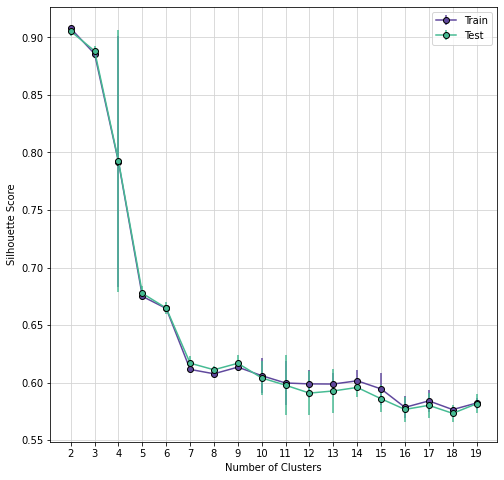

In [157]:
# plotagem do sresultados do Silhouette Average para análise gráfica
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
df_plot = df_silhouette_avg.groupby("n_cluster")
for i, set_label in enumerate(["train", "test"]):
    ax.errorbar(df_plot.mean().index, 
                df_plot.mean()[set_label + "_silhouette"].values, 
                df_plot.std()[set_label + "_silhouette"].values, label=set_label.title(),
               marker='o', mec='black', color = second_palette[i])
ax.set_xticks(arr_n_clusters), ax.set_xticklabels(arr_n_clusters)

ax.grid(True, color="lightgray")
ax.legend()
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
filename = "silhouette_score.jpg"
#fig.savefig(os.path.join(plots_dir, filename), bbox_inches="tight")

**KMeans**

In [158]:
# Silhouette Average mostrou que 4 clusters é o ideal
n_clusters = 4
model = KMeans(n_clusters=n_clusters, random_state=0, verbose=False)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

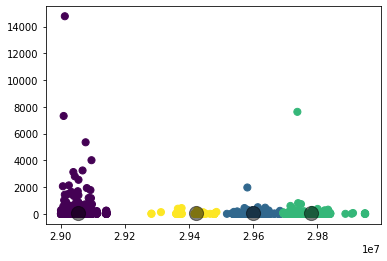

In [159]:
y_kmeans = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [160]:
df_clusters_rewards = pd.DataFrame(model.cluster_centers_)
df_clusters_rewards.columns = df_cluster.columns
df_clusters_rewards = df_clusters_rewards.reset_index(drop=False).rename({"index": "cluster"},axis=1).set_index("cluster")
#df_clusters_rewards.drop(["income"], axis=1, inplace=True)
#df_clusters_rewards.to_csv(os.path.join(data_dir, "df_clusters_rewards.csv"), sep=';')
df_clusters_rewards

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,,,,,
0,2.905467e+07,81.276914,1.377686,2.472562,5.462299,5.487265,5.374650,5.561225,5.595694,5.492063,5.372104,5.521450,5.429538,5.418826,5.431910
1,2.959905e+07,42.567165,1.391941,2.505999,5.458983,5.488369,5.372354,5.548587,5.608838,5.497160,5.383338,5.523159,5.425920,5.424325,5.429289
2,2.978095e+07,48.701582,1.250000,2.183361,5.463431,5.478437,5.371688,5.562310,5.590863,5.491220,5.370090,5.522583,5.431105,5.418625,5.426738
3,2.942202e+07,34.279305,1.361905,1.910538,5.477740,5.503699,5.381615,5.560742,5.589224,5.479603,5.353685,5.507354,5.431888,5.412521,5.443186


In [161]:
dfclusterrewardclone = df_clusters_rewards

In [162]:
del dfclusterrewardclone["id"]
del dfclusterrewardclone["Volume_2019"]
del dfclusterrewardclone["sfdc_tier"]
del dfclusterrewardclone["Buying_Average"]
#del dfclusterrewardclone["Became_Member_on"]
dfclusterrewardclone

,0,1,2,3,4,5,6,7,8,9,10
cluster,,,,,,,,,,,
0,5.462299,5.487265,5.374650,5.561225,5.595694,5.492063,5.372104,5.521450,5.429538,5.418826,5.431910
1,5.458983,5.488369,5.372354,5.548587,5.608838,5.497160,5.383338,5.523159,5.425920,5.424325,5.429289
2,5.463431,5.478437,5.371688,5.562310,5.590863,5.491220,5.370090,5.522583,5.431105,5.418625,5.426738
3,5.477740,5.503699,5.381615,5.560742,5.589224,5.479603,5.353685,5.507354,5.431888,5.412521,5.443186


**MaB**

In [163]:
from mab.greedy import EGreedyDecay

In [164]:

T = 30000
realizations = 20
epsilon = 0.3
beta = 0.001
print ('Starting MAB Experiment')

mean_reward_hist = pd.DataFrame(columns=[i for i in np.arange(T+1)] + ["realization"])

for realization in np.arange(realizations):
    progbar.update_progress(realization/realizations)
    last_reward = np.zeros(n_clusters)
    bandits = [EGreedyDecay(epsilon=epsilon, beta=beta) for _ in np.arange(n_clusters)]
    for i in np.arange(n_clusters):
        bandits[i].set_rewards(dfclusterrewardclone.loc[i])

    temp_mean_reward_hist = dict()
    for cluster in np.arange(n_clusters):
        temp_mean_reward_hist[cluster] = []

    for t in range(1,T):
        for cluster in np.arange(n_clusters):
            item = bandits[cluster].pull_arm(last_reward[cluster]) 
            last_reward[cluster] = bandits[cluster].get_reward(item) 
            temp_mean_reward_hist[cluster].append(bandits[cluster].mean_reward)

    temp_mean_reward_hist = pd.DataFrame(temp_mean_reward_hist).T
    temp_mean_reward_hist["realization"] = realization
    mean_reward_hist = pd.concat([mean_reward_hist, temp_mean_reward_hist], sort=False)
    
mean_reward_hist = mean_reward_hist.reset_index(drop=False).rename({"index": "cluster"}, axis=1)

Starting MAB Experiment
[0:00:50][##########] 95.00% 

Saving file at  EGreedyDecay_mean_average_reward_20_realizations.jpeg


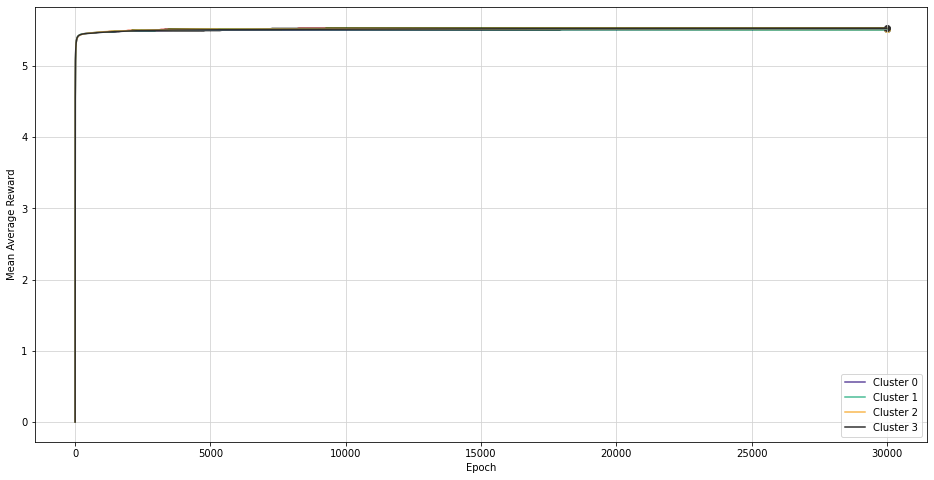

In [165]:
fig, ax = plt.subplots(figsize=(16,8))
df_plot_mean = mean_reward_hist.groupby(["cluster"]).mean()#[np.arange(0, T, 2000)]
df_plot_std = mean_reward_hist.groupby(["cluster"]).std()#[np.arange(0, T, 2000)]
for cluster in np.arange(n_clusters):
    ax.plot(df_plot_mean.iloc[cluster], 
            label = "Cluster " + str(cluster), 
            color=second_palette[cluster], alpha=5)
    
    ax.errorbar(df_plot_mean.columns,
                df_plot_mean.iloc[cluster],                
                df_plot_std.iloc[cluster], 
           color=second_palette[cluster], 
               alpha=.002, label=None)
    
    ax.scatter(x=[T], y=[np.array(df_plot_mean.loc[cluster])[-1]], 
               color=second_palette[cluster], label=None)
    
ax.set_xlabel("Epoch"), ax.set_ylabel("Mean Average Reward")
ax.legend()
ax.grid(True, color="lightgray")
filename = "{}_mean_average_reward_{}_realizations.jpeg".format(str(bandits[0]), realizations)
print ("Saving file at ", filename)

3 [  899.   870.   854. 21359.   879.   821.   800.   869.   906.   854.
   888.]
3 [  861.   865.   910. 21251.   857.   898.   875.   853.   875.   895.
   859.]
3 [  853.   909.   858. 21200.   842.   839.   904.  1010.   912.   821.
   851.]
4 [  947.   893.   889.   884. 21082.   840.   922.   890.   881.   893.
   878.]


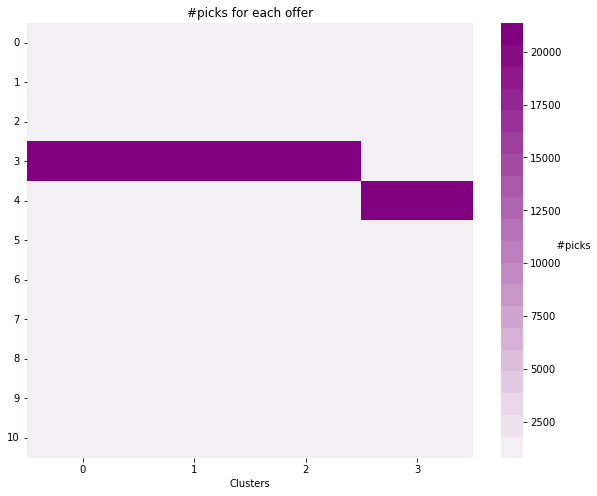

In [166]:
picks = np.zeros([n_clusters, bandits[0].k])
for cluster, bandit in enumerate(bandits):
    picks[cluster] = bandit.k_n
    print (np.argmax(bandit.k_n), bandit.k_n)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(picks.T, ax=ax, cmap=sns.light_palette("purple", n_colors=20))
ax.set_xlabel("Clusters")
ax.set_yticklabels([product for product in dfclusterrewardclone.columns], rotation = 0)
ax.collections[0].colorbar.set_label("     #picks", rotation=0)
ax.set_title("#picks for each offer")
filename = "picks_by_cluster.jpg"


**salvando resultados**

In [167]:
svdFile = open('svd', 'wb')
pickle.dump(svd, svdFile)
svdFile.close()

In [168]:
modelFile = open('model', 'wb')
pickle.dump(model, modelFile)
modelFile.close()

In [169]:
banditFile = open('bandit', 'wb')
pickle.dump(bandit, banditFile)
banditFile.close()

In [170]:
#exportando arquivo de clusters
auxFile4 = auxFile3
auxFile4['cluster'] = model.fit_predict(auxFile4)
# export auxFile3 to Aux.csv
auxFile4.to_csv(root_path + 'Aux.csv', index=True)
auxFile4 = pd.read_csv(root_path + 'Aux.csv')
auxFile4
#mostra a qual cluster o usuario pertence

,Unnamed: 0,index,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on,cluster
0,0,0,29000310,0.480,0,1.338235,20180114,0
1,1,1,29000419,0.450,1,1.851852,20151001,0
2,2,10,29000430,270.970,1,0.923077,20060827,0
3,3,20,29000485,29.610,2,2.666667,20150521,0
4,4,27,29000699,0.420,2,0.694444,20050117,0
...,...,...,...,...,...,...,...,...
4563,4563,548898,29949335,15.400,2,0.566667,20140105,1
4564,4564,548901,29949357,0.420,1,3.714286,20180314,1
4565,4565,548903,29949393,1.000,0,0.287234,20140715,1
4566,4566,549724,29949511,48.853,2,0.506667,20060708,1


In [171]:
df_cluster

,id,Volume_2019,sfdc_tier,Buying_Average,0,1,2,3,4,5,6,7,8,9,10
0,29000310,0.480,0,1.338235,5.448605,5.665304,5.286434,5.572346,5.770794,5.495744,5.318844,5.569447,5.326566,5.384794,5.452460
1,29000419,0.450,1,1.851852,5.512596,5.494223,5.523715,5.465017,5.670326,5.598528,5.325591,5.468836,5.325803,5.508264,5.552035
2,29000430,270.970,1,0.923077,5.465606,5.535381,5.408811,5.568750,5.774466,5.454537,5.230642,5.529205,5.473168,5.439577,5.438398
3,29000485,29.610,2,2.666667,5.446246,5.541511,5.354262,5.430591,5.588183,5.503528,5.393183,5.526822,5.489984,5.439121,5.551558
4,29000699,0.420,2,0.694444,5.576287,5.397848,5.347530,5.579097,5.564144,5.503268,5.299101,5.436777,5.554745,5.281548,5.740085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,29949335,15.400,2,0.566667,5.322323,5.588347,5.214334,5.553583,5.601964,5.505132,5.385559,5.583890,5.576361,5.558697,5.386542
4564,29949357,0.420,1,3.714286,5.290666,5.476234,5.186776,5.531173,5.760303,5.416609,5.387872,5.526795,5.401895,5.283250,5.537188
4565,29949393,1.000,0,0.287234,5.418183,5.527762,5.333144,5.657504,5.493502,5.482948,5.361131,5.470959,5.480390,5.222657,5.299424
4566,29949511,48.853,2,0.506667,5.627544,5.583516,5.458167,5.550627,5.608702,5.406594,5.142929,5.498627,5.408752,5.475296,5.476302


In [172]:
file = open('model', 'rb')
kmeans = pickle.load(file)
file.close()

In [173]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=False)

In [174]:
# pega os clientes em cada cluster mais próximos do centróide (seriam os melhores candidatos a ganhar o desconto)
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centers, X)
closest

array([1486, 3889, 4257, 3659])

In [175]:
# pegaremos o cliente mais próximo do centróid do cluster 0 como exemplo (closest[0])
puxarUsuarioEspecifico = df_cluster.values.astype('float')[closest[0]]
puxarUsuarioEspecifico = puxarUsuarioEspecifico.reshape(1, -1)
cluster = kmeans.predict(puxarUsuarioEspecifico)[0]
print ("User cluster: ", cluster)

User cluster:  0


Getting cluster MAB

In [176]:
file = open('bandit', 'rb')
bandit = pickle.load(file)
file.close()

Loop desses funcoes toda vez que a acao compra ocorrer, se nao ocorrer compra com um usuario especifico, a funcao pull arm deve ocorrer novamente com a reward zerada

In [177]:
#Condicional ocorre novamente caso nao ocorra compra com a recomendacao
bandit_reward = 0

In [178]:
bandit_arm = bandit.pull_arm(bandit_reward)

In [179]:
#vizualizar o desconto escolhido e fornecer para o usuario
bandit_arm

4

In [180]:
#Se a compra for realizada com sucesso atraves do desconto gerado no bandit arm
bandit_reward = bandit.get_reward(bandit_arm)

In [181]:
bandit_reward

5.58922387065841

In [182]:
auxFile6 = auxFile3
auxFile6['cluster'] = model.fit_predict(auxFile6)
auxFile6

,index,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on,cluster
0,0,29000310,0.480,0,1.338235,20180114,0
1,1,29000419,0.450,1,1.851852,20151001,0
2,10,29000430,270.970,1,0.923077,20060827,0
3,20,29000485,29.610,2,2.666667,20150521,0
4,27,29000699,0.420,2,0.694444,20050117,0
...,...,...,...,...,...,...,...
4563,548898,29949335,15.400,2,0.566667,20140105,1
4564,548901,29949357,0.420,1,3.714286,20180314,1
4565,548903,29949393,1.000,0,0.287234,20140715,1
4566,549724,29949511,48.853,2,0.506667,20060708,1


In [183]:
# export auxFile3 to Aux.csv
auxFile6.to_csv(root_path + 'DataProfileWithCluster.csv', index=False)
auxFile6 = pd.read_csv(root_path + 'DataProfileWithCluster.csv')
auxFile6

,index,id,Volume_2019,sfdc_tier,Buying_Average,Became_Member_on,cluster
0,0,29000310,0.480,0,1.338235,20180114,0
1,1,29000419,0.450,1,1.851852,20151001,0
2,10,29000430,270.970,1,0.923077,20060827,0
3,20,29000485,29.610,2,2.666667,20150521,0
4,27,29000699,0.420,2,0.694444,20050117,0
...,...,...,...,...,...,...,...
4563,548898,29949335,15.400,2,0.566667,20140105,1
4564,548901,29949357,0.420,1,3.714286,20180314,1
4565,548903,29949393,1.000,0,0.287234,20140715,1
4566,549724,29949511,48.853,2,0.506667,20060708,1
